In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

Importing plotly failed. Interactive plots will not work.


In [ ]:
df = read_csv('Data/service_request_compare/sr_hex.csv')

In [3]:
df2 = df.loc[((df['department'] == 'Water and Sanitation'))]

In [4]:
df2 = df[['CreationTimestamp','h3_level8_index']]

In [5]:
df2['CreationTimestamp'] = df2.loc[:, ('CreationTimestamp')].astype(str).str[:10]

C:\Users\W7151998\AppData\Local\Temp/ipykernel_44476/698488876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CreationTimestamp'] = df2.loc[:, ('CreationTimestamp')].astype(str).str[:10]


In [6]:
df2['h3_level8_index'] = df2['h3_level8_index'].astype(str)

C:\Users\W7151998\AppData\Local\Temp/ipykernel_44476/2559888662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['h3_level8_index'] = df2['h3_level8_index'].astype(str)


In [7]:
df2.insert(loc=2, column='Total_Requests',value=1)

In [8]:
df2['CreationTimestamp'] = pd.to_datetime(df2['CreationTimestamp'])

C:\Users\W7151998\AppData\Local\Temp/ipykernel_44476/1663591082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CreationTimestamp'] = pd.to_datetime(df2['CreationTimestamp'])


In [9]:
df2 = df2.groupby(['h3_level8_index', pd.Grouper(key='CreationTimestamp', freq='W-MON')])['Total_Requests'].sum().reset_index().sort_values('CreationTimestamp')
print (df2)

        h3_level8_index CreationTimestamp  Total_Requests
0                     0        2017-01-02             220
174531  88ad36c411fffff        2017-01-02               1
66409   88ad361313fffff        2017-01-02               2
66578   88ad361317fffff        2017-01-02               1
174210  88ad36c2dbfffff        2017-01-02               1
...                 ...               ...             ...
175135  88ad36c419fffff        2020-01-06               1
13754   88ad360251fffff        2020-01-06               1
113420  88ad361a9dfffff        2020-01-06               2
184874  88ad36c643fffff        2020-01-06               5
110499  88ad361a55fffff        2020-01-06               2

[207093 rows x 3 columns]


In [10]:
df3 = df2.loc[~((df2['h3_level8_index'] == '0'))]

In [11]:
df3 = df3.groupby(by=['CreationTimestamp']).sum('Total_Requests').reset_index()

In [12]:
df3.tail()

,CreationTimestamp,Total_Requests
153,2019-12-09,17464
154,2019-12-16,14400
155,2019-12-23,15750
156,2019-12-30,8515
157,2020-01-06,1823


In [13]:
# prepare expected column names
df3.columns = ['ds', 'y']

In [14]:
#New Forecasts

In [15]:
#df4 = df3

In [16]:
#model_2 = Prophet(interval_width = 0.95, weekly_seasonality=True)
#model = model_2.fit(df4)

In [17]:
#future = model_2.make_future_dataframe(periods=4, freq='W')
#forecast = model_2.predict(future)

In [18]:
#forecast.tail(10)

In [19]:
#df4.tail(10)

In [20]:
#model_2.plot(forecast)

In [21]:
#len(df4)

In [22]:
#New Forecasts

In [23]:
#train=df4[:138]
#test=df4[138:]

#m=Prophet(weekly_seasonality=True)
#m.fit(train)
#future=m.make_future_dataframe(periods=40,freq='W')
#forecast=m.predict(future)


In [24]:
#forecast.taill()

In [25]:
#df4.tail()

In [26]:
#m.plot(forecast, uncertainty=True)
#plt.show()

In [27]:
#m.plot(forecast)
#ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
#test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2017-01-02','2020-01-06'))

In [28]:
#train, test = train_test_split(df4, test_size = 0.10, shuffle=False)
#model_fit = model_2.fit (train)
#future = model_.make_future_dataframe(periods=20, freq='W')
#predictions = model_fit.predict(future)
#model_fit.plot(predictions)

In [29]:
#predictions.tail()

In [30]:
#df3.tail()

In [31]:
model = Prophet()

train, test = train_test_split(df3, test_size = 0.10, shuffle=False)
model_fit = model.fit (train)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future = model_fit.make_future_dataframe(periods=20, freq='W')
predictions = model_fit.predict(future)

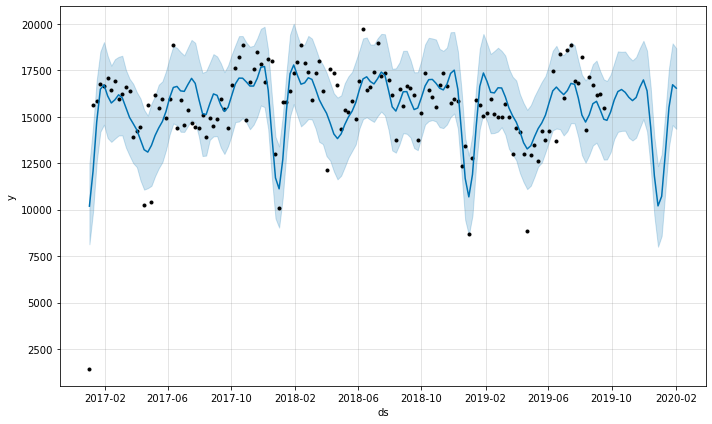

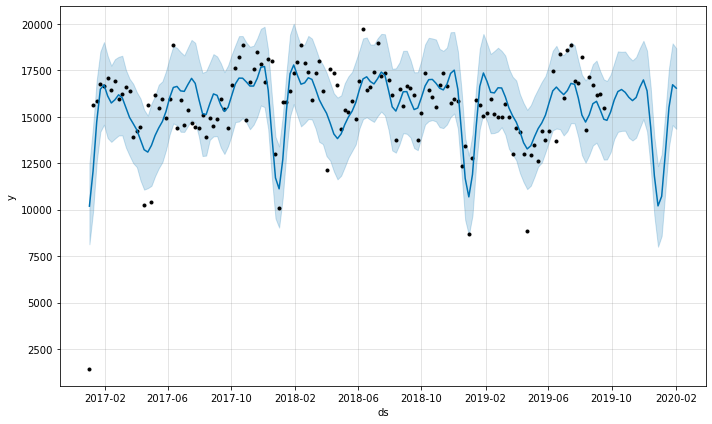

In [33]:
model_fit.plot(predictions)

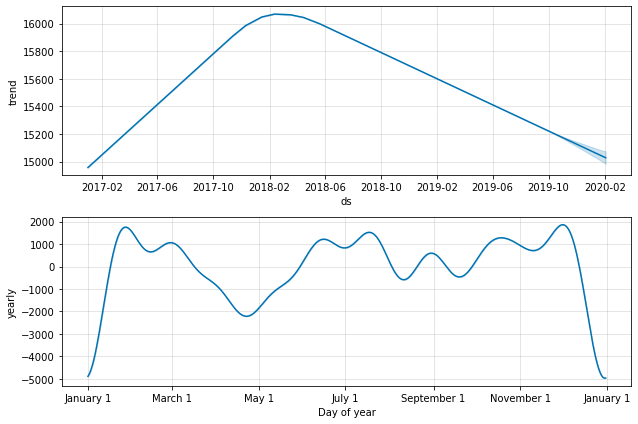

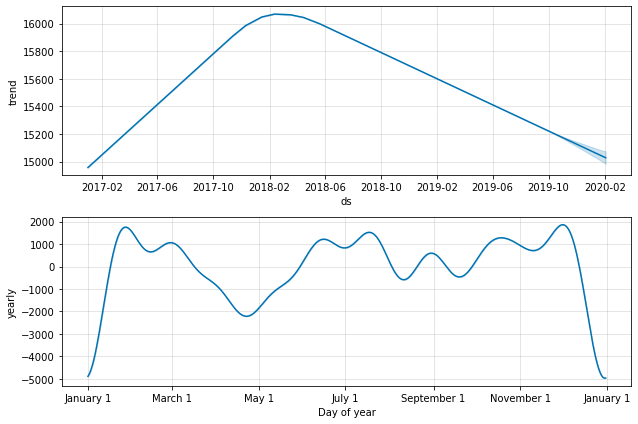

In [34]:
model_fit.plot_components(predictions)

In [35]:
predictions['yhat'] = np.round(predictions['yhat'])
final = predictions.rename({'ds': 'date','yhat' : 'Service Requests Expected'}, axis=1)

In [36]:
print("Final Answer:" )
final[['date','Service Requests Expected']].tail()


Final Answer:


,date,Service Requests Expected
157,2020-01-05,10716.0
158,2020-01-12,13010.0
159,2020-01-19,15495.0
160,2020-01-26,16724.0
161,2020-02-02,16540.0
